<a href="https://colab.research.google.com/github/szetong/WQU-Group-24/blob/master/WQU_Group_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Topic: Which Financial Ratios are best in Identifying Good buys**

---








## Part 1 : Empirical Analysis on Classification of Financial Ratios
1. Financial Ratio and Stock Price are obtained from MorningStar website (https://www.morningstar.com/)
2. Stock listed in China A50 Index will be used for this study
3. 10 years Annual Financial ratios will be used for this study


Import all the necessary librart for the analysis

In [0]:
import pandas as pd
import numpy as np
import io
from scipy.stats import kendalltau, pearsonr, spearmanr
from google.colab import files
from pandas.tseries.offsets import MonthEnd
import math
from IPython.display import display

Indicate the quantity of the stock to analyse for the same industry 

Example: **n = 13** (13 bank stock in China A50 Index) , minimum 2 stocks needed




In [0]:
n = 13

In [0]:
def Ratio_Dataframe(ratio_df,price_df):

  #REMOVE LAST COLUMN
  Ratio_df = ratio_df
  Ratio_df = Ratio_df.dropna(how='all')
  Ratio_df = Ratio_df.reset_index(drop= True)
  Ratio_df = Ratio_df.drop(['TTM'],axis=1)

  #SPLIT INTO FEW FINANCIAL RATIO DATAFRAME
  Ratio_1 = Ratio_df.iloc[:15, :]
  Ratio_Profit_1 = Ratio_df.iloc[16:27, :]
  Ratio_Profit_2 = Ratio_df.iloc[27:36, :]
  Ratio_CashFlow = Ratio_df.iloc[58:65, :]
  Ratio_Financial_Health = Ratio_df.iloc[64:86, :]
  Ratio_Liquidity = Ratio_df.iloc[86:91, :]
  Ratio_Efficiency = Ratio_df.iloc[92:, :]
  
  #GROWTH RATIO
  Growth_Rate_Revenue = Ratio_df.iloc[36:42, :]
  Growth_Rate_Revenue = Growth_Rate_Revenue.replace(to_replace="Year over Year", value= "Revenue_YOY", regex= True)
  Growth_Rate_Operating = Ratio_df.iloc[42:47, :]
  Growth_Rate_Operating = Growth_Rate_Operating.replace(to_replace="Year over Year", value= "Operating_YOY", regex= True)
  Growth_Rate_Income = Ratio_df.iloc[47:52, :]
  Growth_Rate_Income = Growth_Rate_Income.replace(to_replace="Year over Year", value= "Income_YOY", regex= True)
  Growth_Rate_EPS = Ratio_df.iloc[52:58, :]
  Growth_Rate_EPS = Growth_Rate_EPS.replace(to_replace="Year over Year", value= "EPS_YOY", regex= True)

  #PROFITABILITY RATIO
  Gross_Margin_Ratio = Ratio_Profit_2.loc[Ratio_Profit_2['Unnamed: 0']== 'Net Margin %']
  Return_On_Asset = Ratio_Profit_2.loc[Ratio_Profit_2['Unnamed: 0']== 'Return on Assets %']
  Return_On_Equity = Ratio_Profit_2.loc[Ratio_Profit_2['Unnamed: 0']== 'Return on Equity %']
  FCF_Sales = Ratio_Financial_Health.loc[Ratio_Financial_Health['Unnamed: 0']== 'Free Cash Flow/Sales %']
  FCF_Income = Ratio_Financial_Health.loc[Ratio_Financial_Health['Unnamed: 0']== 'Free Cash Flow/Net Income']

  #EFFICIENCY RATIO
  Payables_Period = Ratio_Efficiency.loc[Ratio_Efficiency['Unnamed: 0']== 'Payables Period']
  Cash_Conversion_Cycle = Ratio_Efficiency.loc[Ratio_Efficiency['Unnamed: 0']== 'Cash Conversion Cycle']
  Asset_Turnover = Ratio_Profit_2.loc[Ratio_Profit_2['Unnamed: 0']== 'Payables Period	']
  Fixed_Asset_Turnover = Ratio_Efficiency.loc[Ratio_Efficiency['Unnamed: 0']== 'Fixed Assets Turnover']

  #PRICE RATIO
  Dividend_Payout_Ratio = Ratio_1.loc[Ratio_1['Unnamed: 0']== 'Payout Ratio % *']
  Earning_Per_Share = Ratio_1.loc[Ratio_1['Unnamed: 0']== 'Earnings Per Share CNY']
  FCF_Per_Share = Ratio_1.loc[Ratio_1['Unnamed: 0']== 'Free Cash Flow Per Share * CNY']

  #LEVERAGE RATIO
  Debt_To_Equity = Ratio_Liquidity.loc[Ratio_Liquidity['Unnamed: 0']== 'Debt/Equity']
  Financial_Leverage = Ratio_Profit_2.loc[Ratio_Profit_2['Unnamed: 0']== 'Financial Leverage (Average)']
  Current_Ratio = Ratio_Liquidity.loc[Ratio_Liquidity['Unnamed: 0']== 'Current Ratio']
  Quick_Ratio = Ratio_Liquidity.loc[Ratio_Liquidity['Unnamed: 0']== 'Quick Ratio']

  #VALUATION RATIO
  Shares = Ratio_1.loc[Ratio_1['Unnamed: 0']== 'Shares Mil']
  BookValue_Per_Share = Ratio_1.loc[Ratio_1['Unnamed: 0']== 'Book Value Per Share * CNY']
  Revenue_Growth_YOY = Growth_Rate_Revenue.loc[Growth_Rate_Revenue['Unnamed: 0']== 'Revenue_YOY']
  Operation_Growth_YOY = Growth_Rate_Operating.loc[Growth_Rate_Operating['Unnamed: 0']== 'Operating_YOY']
  NetIncome_Growth_YOY = Growth_Rate_Income.loc[Growth_Rate_Income['Unnamed: 0']== 'Income_YOY']
  EPS_Growth_YOY = Growth_Rate_EPS.loc[Growth_Rate_EPS['Unnamed: 0']== 'EPS_YOY']

  #FILTER ONLY SELECTED FINANICAL RATIO
  Ratio_sum = pd.concat([Shares,Revenue_Growth_YOY,Operation_Growth_YOY,NetIncome_Growth_YOY,EPS_Growth_YOY,Return_On_Equity,Return_On_Asset,Gross_Margin_Ratio,Earning_Per_Share,BookValue_Per_Share,
                      FCF_Per_Share, Dividend_Payout_Ratio,Debt_To_Equity,Current_Ratio,Quick_Ratio,FCF_Sales,FCF_Income,Financial_Leverage,Asset_Turnover,Fixed_Asset_Turnover,
                      Cash_Conversion_Cycle,Payables_Period ], ignore_index=True)

  #MERGE YEAR END PRICE WITH RATIO
  Ratio_sum = Ratio_sum.rename(columns= {'Unnamed: 0': 'Description'})
  Ratio_sum = Ratio_sum.append({'Description' : 'Market Capital Mil'}, ignore_index = True)
  Ratio_sum = Ratio_sum.append({'Description' : 'Price/Earning Ratio'}, ignore_index = True)
  Ratio_sum = Ratio_sum.append({'Description' : 'Price/Book Ratio'}, ignore_index = True)
  Ratio_sum = Ratio_sum.append({'Description' : 'Price/FCF'}, ignore_index = True)
  Ratio_sum = Ratio_sum.append({'Description' : 'PEG Ratio'}, ignore_index = True)
  Ratio_sum = Ratio_sum.set_index('Description')
  Ratio_sum.columns = pd.to_datetime(Ratio_sum.columns) + MonthEnd(1)
  Ratio_sum.columns = Ratio_sum.columns.astype("datetime64[ns]")
  Price_df = price_df
  Price_df['Date']=pd.to_datetime(Price_df['Date'])
  Price_df = Price_df.drop(['Name','Volume'],axis=1)
  Price_df = Price_df.rename(columns= {'Price': 'Year End Price'})
  for column in Ratio_sum:
    Ratio_sum[column] = Ratio_sum[column].str.replace(",","").astype(float)
  comb = pd.merge_asof(left=Ratio_sum.T, left_index=True ,right=Price_df, right_on='Date')
  comb = comb.set_index('Date')
  comb = comb.T
  comb = comb.transform(pd.to_numeric, errors='coerce')
  comb.loc['Market Capital Mil'] = comb.loc['Year End Price'] * comb.loc['Shares Mil']
  comb.loc['Price/Earning Ratio'] = comb.loc['Year End Price'] / comb.loc['Earnings Per Share CNY']
  comb.loc['PEG Ratio'] = comb.loc['Price/Earning Ratio'] / comb.loc['EPS_YOY']
  comb.loc['Price/Book Ratio'] = comb.loc['Year End Price'] / comb.loc['Book Value Per Share * CNY']
  comb.loc['Price/FCF'] = comb.loc['Year End Price'] / comb.loc['Free Cash Flow Per Share * CNY']
  comb = comb.round(decimals=2)

  #REMOVE COLUMN IF STOCK PRICE ARE MISSING
  comb_copy = comb.copy()
  for i in range(len(comb_copy.columns)):
    if (comb_copy.loc['Year End Price'][i] == 0):
      comb.loc['Year End Price'] = comb.loc['Year End Price'].replace(0, np.nan)
      comb = comb.dropna(axis=1)


  #OBTAIN CORRELATION FOR 3 DIFFERENT METHOD
  Ratio_correlation = comb
  #Ratio_correlation = Ratio_correlation.fillna(0)
  Ratio_correlation = Ratio_correlation.transpose()
  Ratio_correlation = Ratio_correlation.replace(np.inf,0)
  Ratio_correlation_P =  Ratio_correlation.corr(method='pearson')
  Ratio_correlation_K = Ratio_correlation.corr(method='kendall')
  Ratio_correlation_S = Ratio_correlation.corr(method='spearman')
  Summary_P = pd.DataFrame()
  Summary_P['Pearson Correlation'] = Ratio_correlation_P['Year End Price']
  Summary_K = pd.DataFrame()
  Summary_K['Kendal Correlation'] = Ratio_correlation_K['Year End Price']
  Summary_S = pd.DataFrame()
  Summary_S['Spearman Correlation'] = Ratio_correlation_S['Year End Price']
  
  #SAVE CORRELATION FILE TO LOCAL
  Name = pn
  Name = Name.replace('.csv','')
  
  Summary_P.to_csv(Name +'_Pearson.csv') 
  files.download(Name +'_Pearson.csv')
  Summary_K.to_csv(Name +'_Kendal.csv') 
  files.download(Name +'_Kendal.csv')
  Summary_S.to_csv(Name +'_Spearman.csv') 
  files.download(Name +'_Spearman.csv')

  #SAVE FINANCIAL RATIO SUMMARY FILE TO LOCAL
  comb.to_csv(Name +'_Summary.csv') 
  files.download(Name +'_Summary.csv')
    
  corr_combine = pd.DataFrame()
  #Name_2 = Name + 'Correlation'
  corr_combine[Name + ' Pearson'] = Summary_P['Pearson Correlation']
  corr_combine[Name + ' Kendall'] = Summary_K['Kendal Correlation']
  corr_combine[Name + ' Spearman'] = Summary_S['Spearman Correlation']

  return comb, corr_combine, Name

Upload the Financial Ratio files and Stock Price File that obtain from MorningStar 
1. Eg. 601288 Key Ratios.csv (Financial Ratio File)
2. Eg. 601288.csv (Stock Price File)

(Note: Upload **n** times of both Financial Ratio Files and Stock Price File)

This code will download Correlation files and Summary file upon completion

In [4]:
stock_df = {}
corr = {}
name = {}
for i in range(n):
  print('\n Kindly upload Stock Key Financial Ratio File(CSV)')
  uploaded = files.upload()  
  for fn in uploaded.keys():
    stock_df[i] = pd.read_csv(fn,header=2)
    print('\n Kindly upload Stock Price File for "{name}" '.format(name=fn))
  
  uploaded_1 = files.upload()
  for pn in uploaded_1.keys():
    Price_raw = pd.read_csv(pn,index_col= False)
    stock_df[i], corr[i], name[i] = Ratio_Dataframe(stock_df[i],Price_raw)


 Kindly upload Stock Key Financial Ratio File(CSV)


Saving 601288 Key Ratios.csv to 601288 Key Ratios.csv

 Kindly upload Stock Price File for "601288 Key Ratios.csv" 


Saving 601288.csv to 601288.csv

 Kindly upload Stock Key Financial Ratio File(CSV)


Saving 601169 Key Ratios.csv to 601169 Key Ratios.csv

 Kindly upload Stock Price File for "601169 Key Ratios.csv" 


Saving 601169.csv to 601169.csv

 Kindly upload Stock Key Financial Ratio File(CSV)


Saving 601988 Key Ratios.csv to 601988 Key Ratios.csv

 Kindly upload Stock Price File for "601988 Key Ratios.csv" 


Saving 601988.csv to 601988.csv

 Kindly upload Stock Key Financial Ratio File(CSV)


Saving 601328 Key Ratios.csv to 601328 Key Ratios.csv

 Kindly upload Stock Price File for "601328 Key Ratios.csv" 


Saving 601328.csv to 601328.csv

 Kindly upload Stock Key Financial Ratio File(CSV)


Saving 601998 Key Ratios.csv to 601998 Key Ratios.csv

 Kindly upload Stock Price File for "601998 Key Ratios.csv" 


Saving 601998.csv to 601998.csv

 Kindly upload Stock Key Financial Ratio File(CSV)


Saving 601939 Key Ratios.csv to 601939 Key Ratios.csv

 Kindly upload Stock Price File for "601939 Key Ratios.csv" 


Saving 601939.csv to 601939.csv

 Kindly upload Stock Key Financial Ratio File(CSV)


Saving 601818 Key Ratios.csv to 601818 Key Ratios.csv

 Kindly upload Stock Price File for "601818 Key Ratios.csv" 


Saving 601818.csv to 601818.csv

 Kindly upload Stock Key Financial Ratio File(CSV)


Saving 600036 Key Ratios.csv to 600036 Key Ratios.csv

 Kindly upload Stock Price File for "600036 Key Ratios.csv" 


Saving 600036.csv to 600036.csv

 Kindly upload Stock Key Financial Ratio File(CSV)


Saving 600016 Key Ratios.csv to 600016 Key Ratios.csv

 Kindly upload Stock Price File for "600016 Key Ratios.csv" 


Saving 600016.csv to 600016.csv

 Kindly upload Stock Key Financial Ratio File(CSV)


Saving 601398 Key Ratios.csv to 601398 Key Ratios.csv

 Kindly upload Stock Price File for "601398 Key Ratios.csv" 


Saving 601398.csv to 601398.csv

 Kindly upload Stock Key Financial Ratio File(CSV)


Saving 601166 Key Ratios.csv to 601166 Key Ratios.csv

 Kindly upload Stock Price File for "601166 Key Ratios.csv" 


Saving 601166.csv to 601166.csv

 Kindly upload Stock Key Financial Ratio File(CSV)


Saving 000001 Key Ratios.csv to 000001 Key Ratios.csv

 Kindly upload Stock Price File for "000001 Key Ratios.csv" 


Saving 000001.csv to 000001.csv

 Kindly upload Stock Key Financial Ratio File(CSV)


Saving 600000 Key Ratios.csv to 600000 Key Ratios.csv

 Kindly upload Stock Price File for "600000 Key Ratios.csv" 


Saving 600000.csv to 600000.csv


In [5]:
stock = stock_df.copy()
Ratio_ave = {}
Price_return = {}

#COMBINE ALL CORRELATION COEFFICIENT INTO ONE
for i in range(n):
  Ratio_ave[i] = stock[i]
  Ratio_ave[i] = Ratio_ave[i].mean(axis=1,skipna=True)
  Price_return[i] = (stock[i].loc['Payout Ratio % *'] * stock[i].loc['Earnings Per Share CNY'] /100)
  Price_return[i] = (( stock[i].loc['Year End Price'][-1] + Price_return[i].sum()) / stock[i].loc['Year End Price'][0]) - 1

Ratio_ave = pd.concat(Ratio_ave.values(),ignore_index=False,axis=1)
Corr_overall = pd.concat(corr.values(),ignore_index=False,axis=1)
Corr_overall = Corr_overall.round(decimals=2)

#CONVERT CORRELATION COEFFICIENT INTO DIFFERENT STRENGHT 
for i in range(len(Corr_overall)):
  for j in range(len(Corr_overall.columns)):
    if (Corr_overall.iloc[i,j] >= 0 and Corr_overall.iloc[i,j] <= 0.3):
      Corr_overall.iloc[i,j] = "None"
    elif (Corr_overall.iloc[i,j] >= 0.3 and Corr_overall.iloc[i,j] <= 0.5):
      Corr_overall.iloc[i,j] = "Weak"
    elif (Corr_overall.iloc[i,j] >= 0.5 and Corr_overall.iloc[i,j] <= 0.7):
      Corr_overall.iloc[i,j] = "Moderate"
    elif (Corr_overall.iloc[i,j] >= 0.7):
      Corr_overall.iloc[i,j] = "Strong"
    elif (Corr_overall.iloc[i,j] >= -0.3):
      Corr_overall.iloc[i,j] = "None"
    elif (Corr_overall.iloc[i,j] >= -0.5 and Corr_overall.iloc[i,j] < -0.3):
      Corr_overall.iloc[i,j] = "Weak"
    elif (Corr_overall.iloc[i,j] >= -0.7 and Corr_overall.iloc[i,j] < -0.5):
      Corr_overall.iloc[i,j] = "Moderate"
    elif (Corr_overall.iloc[i,j] < -0.7):
      Corr_overall.iloc[i,j] = "Strong"

#CONVERT CORRELATION STRENGTH INTO GRADING POINT (NONE = 1, WEAK = 2, MODERATE = 3, STRONG = 4)
Corr_rating = Corr_overall
for i in range(len(Corr_rating)):
  for j in range(len(Corr_rating.columns)):
    if (Corr_rating.iloc[i,j] == 'None'):
      Corr_rating.iloc[i,j] = 1
    elif (Corr_rating.iloc[i,j] == 'Weak'):
      Corr_rating.iloc[i,j] = 2
    elif (Corr_rating.iloc[i,j] == 'Moderate'):
      Corr_rating.iloc[i,j] = 3
    elif (Corr_rating.iloc[i,j] == 'Strong'):
      Corr_rating.iloc[i,j] = 4
Corr_rating = Corr_rating.dropna(how='all')
Corr_rating['Overall'] = Corr_rating.sum(axis=1)

#GENERATE CORRELATION GRADING POINT RANGE TABLE BASED ON BELOW PERCENTAGE
max_rating = (len(Corr_rating.columns) - 1) * 4 
min_rating = (len(Corr_rating.columns) - 1) * 1
diff_rating = max_rating - min_rating

#Portion of Rating, make sure Total = 100%
portion_1 = 0.15    # NONE CORRELATION
portion_2 = 0.25    # WEAK CORRELATION
portion_3 = 0.30    # MODERATE CORRELATION
portion_4 = 0.30    # STRONG CORRELATION

Range_N = round(min_rating + (portion_1 * diff_rating))
Range_W = round(Range_N + (portion_2 * diff_rating))
Range_M = round(Range_W + (portion_3 * diff_rating))
Range_S = max_rating

print('--------------------------------')
print('Correlation Rating Range')
print('--------------------------------')
print('None     :  ', min_rating, '   to   ', Range_N )
print('Weak     :  ', Range_N, '   to   ', Range_W )
print('Moderate :  ', Range_W, '  to   ', Range_M )
print('Strong   :  ', Range_M, '  to   ', Range_S )
print('--------------------------------')
print('\n')

#GENERATE OVERALL
for i in range(len(Corr_rating)):
  if (Corr_rating.iloc[i,-1] >= min_rating and Corr_rating.iloc[i,-1] <= Range_N):
      Corr_rating.iloc[i,-1] = 'None'

  elif (Corr_rating.iloc[i,-1] > Range_N and Corr_rating.iloc[i,-1] <= Range_W):
      Corr_rating.iloc[i,-1] = 'Weak'

  elif (Corr_rating.iloc[i,-1] > Range_W and Corr_rating.iloc[i,-1] <= Range_M):
      Corr_rating.iloc[i,-1] = 'Moderate'
 
  elif (Corr_rating.iloc[i,-1] > Range_M and Corr_rating.iloc[i,-1] <= Range_S):
      Corr_rating.iloc[i,-1] = 'Strong'

Corr_rating_overall = Corr_rating['Overall']
#DROP ALL UNRELATED FINANCIAL RATIO
Corr_rating_overall = Corr_rating_overall.drop(['Shares Mil','Year End Price','Market Capital Mil'])
display(Corr_rating_overall)

#GENERATE IMPORTANT FINANCIAL RATIO BASED ON MODERATE TO STRONG CORRELATION
Imp_ratio = Corr_rating_overall
Imp_ratio = pd.DataFrame(Imp_ratio)
for i in range(len(Corr_rating_overall)):
  if (Corr_rating_overall.iloc[i] == 'None' or Corr_rating_overall.iloc[i] =='Weak'):
    Imp_ratio = Imp_ratio.drop([Corr_rating_overall.index[i]])

Imp_ratio = Imp_ratio.reset_index() 
if (Corr_rating_overall.loc['Earnings Per Share CNY'] == 'Moderate' or Corr_rating_overall.loc['Earnings Per Share CNY'] == 'Strong'):
  Imp_ratio = Imp_ratio.append({ 'index' : 'Income_YOY'},ignore_index=True)
  Imp_ratio = Imp_ratio.append({ 'index' : 'EPS_YOY'},ignore_index=True)
  Imp_ratio = Imp_ratio.append({ 'index' : 'Return on Equity %'},ignore_index=True)
  Imp_ratio = Imp_ratio.append({ 'index' : 'Price/Earning Ratio'},ignore_index=True)
  Imp_ratio = Imp_ratio.append({ 'index' : 'PEG Ratio'},ignore_index=True)

if (Corr_rating_overall.loc['Book Value Per Share * CNY'] == 'Moderate' or Corr_rating_overall.loc['Book Value Per Share * CNY'] == 'Strong'):
  Imp_ratio = Imp_ratio.append({ 'index' : 'Return on Assets %'},ignore_index=True)
  #Imp_ratio = Imp_ratio.append({ 'index' : 'Current Ratio'},ignore_index=True)
  Imp_ratio = Imp_ratio.append({ 'index' : 'Price/Book Ratio'},ignore_index=True)

if (Corr_rating_overall.loc['Free Cash Flow Per Share * CNY'] == 'Moderate' or Corr_rating_overall.loc['Free Cash Flow Per Share * CNY'] == 'Strong'):
  Imp_ratio = Imp_ratio.append({ 'index' : 'Price/FCF'},ignore_index=True)

#Imp_ratio = Imp_ratio.set_index('index')
#Imp_ratio = Imp_ratio.drop(['Earnings Per Share CNY','Book Value Per Share * CNY', 'Free Cash Flow Per Share * CNY'])
Imp_ratio = Imp_ratio.drop_duplicates (subset= 'index',keep='first')
Imp_ratio = Imp_ratio.set_index('index')

#GENERATE PRICE RETURN TABLE
Price_return = pd.DataFrame(Price_return.items(),columns=['Stock','Total Return'])
for i in range(len(Price_return)):
  Price_return['Stock'][i] = name[i]

Price_return_percent = Price_return
Price_return_percent['Total Return'] = Price_return['Total Return'] * 100
display(Price_return_percent)
print("Above Table show 10 Year Returns of Price include dividend")

#FILTER BEST 2 RETURN AMONG SAME INDUSTRY
best_2 = Price_return.nlargest(2,'Total Return')
best_2 = best_2.sort_index()
Ratio_best_2 = {}

for i in range(len(best_2)):
  for j in range(len(Ratio_ave.columns)):
    if (best_2.index[i] == Ratio_ave.columns[j]):
      Ratio_best_2[i] = Ratio_ave[j]

Ratio_best_2 = pd.concat(Ratio_best_2.values(),ignore_index=False,axis=1)

--------------------------------
Correlation Rating Range
--------------------------------
None     :   39    to    57
Weak     :   57    to    86
Moderate :   86   to    121
Strong   :   121   to    156
--------------------------------




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

Revenue_YOY                           Weak
Income_YOY                        Moderate
EPS_YOY                               Weak
Return on Equity %                Moderate
Return on Assets %                Moderate
Net Margin %                      Moderate
Earnings Per Share CNY            Moderate
Book Value Per Share * CNY        Moderate
Free Cash Flow Per Share * CNY        None
Payout Ratio % *                      Weak
Debt/Equity                       Moderate
Financial Leverage (Average)      Moderate
Fixed Assets Turnover                 Weak
Price/Earning Ratio               Moderate
Price/Book Ratio                      Weak
Price/FCF                             None
PEG Ratio                             Weak
Name: Overall, dtype: object

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Stock,Total Return
0,601288,91.366791
1,601169,-56.435360
2,601988,66.817957
3,601328,55.187952
4,601998,54.358381
5,601939,115.654684
6,601818,45.674242
7,600036,240.817564
8,600016,94.237081
9,601398,92.426651


Above Table show 10 Year Returns of Price include dividend


In [6]:
# GENERATE RECOMMENDATION IMPORTANT RATIO BASED ON TOP 2 HIGHEST STOCK RETURN
for i in range(len(Imp_ratio)):
  for j in range(len(Ratio_best_2)):
    if (Imp_ratio.index[i] == Ratio_best_2.index[j] and Imp_ratio.index[i] == 'Return on Equity %'):
      cal = Ratio_best_2.loc['Return on Equity %'].min()
      Imp_ratio.loc['Return on Equity %'] = (cal - (cal * 0.1))
      Imp_ratio.loc['Return on Equity %'] = math.floor(Imp_ratio.loc['Return on Equity %'])
    
    elif (Imp_ratio.index[i] == Ratio_best_2.index[j] and Imp_ratio.index[i] == 'Price/Earning Ratio'):
      cal = Ratio_best_2.loc['Price/Earning Ratio'].max()
      Imp_ratio.loc['Price/Earning Ratio'] = (cal + (cal * 0.05))
      Imp_ratio.loc['Price/Earning Ratio'] = math.floor(Imp_ratio.loc['Price/Earning Ratio'])

    elif (Imp_ratio.index[i] == Ratio_best_2.index[j] and Imp_ratio.index[i] == 'Return on Assets %'):
      cal = Ratio_best_2.loc['Return on Assets %'].min()
      Imp_ratio.loc['Return on Assets %'] = (cal - (cal * 0.10))
      #Imp_ratio.loc['Return on Assets %'] = math.ceil(Imp_ratio.loc['Return on Assets %']) #Dont use this if value is too low

    elif (Imp_ratio.index[i] == Ratio_best_2.index[j] and Imp_ratio.index[i] == 'Net Margin %'):
      cal = Ratio_best_2.loc['Net Margin %'].min()
      Imp_ratio.loc['Net Margin %'] = (cal - (cal * 0.10))
      Imp_ratio.loc['Net Margin %'] = math.floor(Imp_ratio.loc['Net Margin %'])

    elif (Imp_ratio.index[i] == Ratio_best_2.index[j] and Imp_ratio.index[i] == 'Price/Book Ratio'):
      cal = Ratio_best_2.loc['Price/Book Ratio'].min()
      Imp_ratio.loc['Price/Book Ratio'] = (cal + (cal * 0.05))
      Imp_ratio.loc['Price/Book Ratio'] = math.floor(Imp_ratio.loc['Price/Book Ratio'])

    elif (Imp_ratio.index[i] == Ratio_best_2.index[j] and Imp_ratio.index[i] == 'Price/FCF'):
      cal = Ratio_best_2.loc['Price/FCF'].min()
      Imp_ratio.loc['Price/FCF'] = (cal + (cal * 0.05))
      Imp_ratio.loc['Price/FCF'] = math.floor(Imp_ratio.loc['Price/FCF'])

    elif (Imp_ratio.index[i] == Ratio_best_2.index[j] and Imp_ratio.index[i] == 'Financial Leverage (Average)'):
      cal = Ratio_best_2.loc['Financial Leverage (Average)'].min()
      Imp_ratio.loc['Financial Leverage (Average)'] = (cal + (cal * 0.10))
      Imp_ratio.loc['Financial Leverage (Average)'] = math.floor(Imp_ratio.loc['Financial Leverage (Average)'])

    elif (Imp_ratio.index[i] == Ratio_best_2.index[j] and Imp_ratio.index[i] == 'Debt/Equity'):
      Imp_ratio.loc['Debt/Equity'] = 'Below 1'

    elif (Imp_ratio.index[i] == Ratio_best_2.index[j] and Imp_ratio.index[i] == 'Current Ratio'):
      cal = Ratio_best_2.loc['Current Ratio'].min()
      Imp_ratio.loc['Current Ratio'] = (cal + (cal * 0.05))
      Imp_ratio.loc['Current Ratio'] = math.floor(Imp_ratio.loc['Current Ratio'])      

    elif (Imp_ratio.index[i] == Ratio_best_2.index[j] and Imp_ratio.index[i] == 'PEG Ratio'):
      #cal = Ratio_best_2.loc['PEG Ratio'].mean()
      #Imp_ratio.loc['PEG Ratio'] = (cal + (cal * 0.05))
      #Imp_ratio.loc['PEG Ratio'] = math.floor(Imp_ratio.loc['PEG Ratio'])
      Imp_ratio.loc['PEG Ratio'] = 'Below 1'

    elif (Imp_ratio.index[i] == Ratio_best_2.index[j] and Imp_ratio.index[i] == 'Income_YOY'):
      Imp_ratio.loc['Income_YOY'] = 'Positive over for at least 1 year'

    elif (Imp_ratio.index[i] == Ratio_best_2.index[j] and Imp_ratio.index[i] == 'EPS_YOY'):
      Imp_ratio.loc['EPS_YOY'] = 'Positive over for at least 1 year'

Imp_ratio

,Overall
index,
Income_YOY,Positive over for at least 1 year
Return on Equity %,13
Return on Assets %,0.792
Net Margin %,24
Earnings Per Share CNY,Moderate
Book Value Per Share * CNY,Moderate
Debt/Equity,Below 1
Financial Leverage (Average),16
Price/Earning Ratio,8


In [7]:
for z in range(n):
  
  xxx = stock[z].copy()
  xxx = xxx.drop(['Shares Mil','Earnings Per Share CNY','Book Value Per Share * CNY','Free Cash Flow Per Share * CNY','Market Capital Mil'])

  for i in range(len(xxx)):
    for j in range(len(Imp_ratio)):
      if (xxx.index[i] == Imp_ratio.index[j] and xxx.index[i] == 'Return on Equity %'):
        xxx.loc['Return on Equity %'] = xxx.loc['Return on Equity %'].apply(lambda x: 'Pass' if (x >= Imp_ratio.loc['Return on Equity %'].values) else 'Out')

      elif (xxx.index[i] == Imp_ratio.index[j] and xxx.index[i] == 'Price/Earning Ratio'):
        xxx.loc['Price/Earning Ratio'] = xxx.loc['Price/Earning Ratio'].apply(lambda x: 'Pass' if (x <= Imp_ratio.loc['Price/Earning Ratio'].values) else 'Out')

      elif (xxx.index[i] == Imp_ratio.index[j] and xxx.index[i] == 'PEG Ratio'):
        #xxx.loc['PEG Ratio'] = xxx.loc['PEG Ratio'].apply(lambda x: 'Pass' if (x <= Imp_ratio.loc['PEG Ratio'].values) else 'Out')
        xxx.loc['PEG Ratio'] = xxx.loc['PEG Ratio'].apply(lambda x: 'Pass' if (x <= 1) else 'Out')

      elif (xxx.index[i] == Imp_ratio.index[j] and xxx.index[i] == 'Return on Assets %'):
        xxx.loc['Return on Assets %'] = xxx.loc['Return on Assets %'].apply(lambda x: 'Pass' if (x >= Imp_ratio.loc['Return on Assets %'].values) else 'Out')

      elif (xxx.index[i] == Imp_ratio.index[j] and xxx.index[i] == 'Net Margin %'):
        xxx.loc['Net Margin %'] = xxx.loc['Net Margin %'].apply(lambda x: 'Pass' if (x >= Imp_ratio.loc['Net Margin %'].values) else 'Out')

      elif (xxx.index[i] == Imp_ratio.index[j] and xxx.index[i] == 'Current Ratio'):
        xxx.loc['Current Ratio'] = xxx.loc['Current Ratio'].apply(lambda x: 'Pass' if (x >= Imp_ratio.loc['Current Ratio'].values) else 'Out')

      elif (xxx.index[i] == Imp_ratio.index[j] and xxx.index[i] == 'Price/Book Ratio'):
        xxx.loc['Price/Book Ratio'] = xxx.loc['Price/Book Ratio'].apply(lambda x: 'Pass' if (x <= Imp_ratio.loc['Price/Book Ratio'].values) else 'Out')

      elif (xxx.index[i] == Imp_ratio.index[j] and xxx.index[i] == 'Financial Leverage (Average)'):
          xxx.loc['Financial Leverage (Average)'] = xxx.loc['Financial Leverage (Average)'].apply(lambda x: 'Pass' if (x <= Imp_ratio.loc['Financial Leverage (Average)'].values) else 'Out')

      elif (xxx.index[i] == Imp_ratio.index[j] and xxx.index[i] == 'Price/FCF'):
        xxx.loc['Price/FCF'] = xxx.loc['Price/FCF'].apply(lambda x: 'Pass' if (x <= Imp_ratio.loc['Price/FCF'].values) else 'Out')

      elif ( xxx.index[i] == 'Debt/Equity' and xxx.index[i] == Imp_ratio.index[j]):
        xxx.loc['Debt/Equity'] = xxx.loc['Debt/Equity'].apply(lambda x: 'Pass' if (x <= 1) else 'Out')

    if ( xxx.index[i] == 'Income_YOY'):
      xxx.loc['Income_YOY'] = xxx.loc['Income_YOY'].apply(lambda x: 'Pass' if (x >= 0.0) else 'Out')

    elif ( xxx.index[i] == 'EPS_YOY'):
      xxx.loc['EPS_YOY'] = xxx.loc['EPS_YOY'].apply(lambda x: 'Pass' if (x >= 0.0) else 'Out')


  xxx = xxx.dropna(how='all')
  yyy = xxx.copy()

  for i in range(len(xxx)-1):
    if (xxx.iloc[i,-1] != 'Pass') and (xxx.iloc[i,-1] != 'Out'):
      row = xxx.index[i]
      yyy = yyy.drop(row)

  yyy = yyy.append(pd.Series(name='Stock Price Return',dtype=float))
  yyy.loc['Stock Price Return'] = yyy.loc['Year End Price'].pct_change() * 100
  #yyy = yyy.dropna(axis=1)
  yyy = yyy.append(pd.Series(name='Decision',dtype=str))

  for i in range(len(yyy.columns)):
    count = yyy[yyy.columns[i]].str.count('Out').sum()
    if (count <= 2):
      yyy.loc['Decision'][i] = 'Buy'
    
    elif (2 < count <=4):
      yyy.loc['Decision'][i] = 'Hold'
    
    else:
      yyy.loc['Decision'][i] = 'Sell'
  print('\n\n Classification of stock ' + name[z])
  display(yyy)

  buy_return = 0
  positive_count = 0
  for i in range(len(yyy.columns)-1):
    if (yyy.loc['Decision'][i] == 'Buy'):
      buy_return = buy_return + yyy.loc['Stock Price Return'][i+1]
  buy_return = round(buy_return, 2)
  print('Total return using "BUY" Strategy for stock ',name[z], 'is', buy_return,'%')

  for i in range(len(yyy.columns)-1):
    if (yyy.loc['Decision'][i] == 'Buy' and yyy.loc['Stock Price Return'][i+1] >= 0):
      positive_count = positive_count + 1  
  all_buy = yyy.loc['Decision'].str.count('Buy').sum() - yyy.loc['Decision'][-1].count('Buy')  
  result_buy = round(positive_count/all_buy,2) * 100
  print('Percentage of Positive Return if "BUY" triggered for stock ',name[z], 'is', result_buy, '%')




 Classification of stock 601288


,2010-12-31,2011-12-30,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-30,2017-12-29,2018-12-31,2019-12-31
Income_YOY,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
EPS_YOY,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Return on Equity %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Out
Return on Assets %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Net Margin %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Debt/Equity,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Financial Leverage (Average),Out,Out,Out,Out,Pass,Pass,Pass,Pass,Pass,Pass
Price/Earning Ratio,Out,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Price/Book Ratio,Out,Out,Out,Pass,Out,Pass,Pass,Pass,Pass,Pass
PEG Ratio,Pass,Pass,Pass,Pass,Pass,Out,Out,Out,Out,Out


Total return using "BUY" Strategy for stock  601288 is 48.12 %
Percentage of Positive Return if "BUY" triggered for stock  601288 is 50.0 %


 Classification of stock 601169


,2009-12-31,2010-12-31,2011-12-30,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-30,2017-12-29,2018-12-31
Income_YOY,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
EPS_YOY,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Out
Return on Equity %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Out
Return on Assets %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Net Margin %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Debt/Equity,Pass,Pass,Pass,Pass,Pass,Pass,Out,Out,Out,Out
Financial Leverage (Average),Pass,Out,Out,Pass,Out,Pass,Out,Out,Pass,Pass
Price/Earning Ratio,Out,Out,Out,Out,Out,Out,Out,Out,Pass,Pass
Price/Book Ratio,Out,Out,Out,Out,Out,Out,Out,Out,Out,Pass
PEG Ratio,Out,Out,Pass,Pass,Pass,Pass,Out,Out,Out,Pass


Total return using "BUY" Strategy for stock  601169 is -22.91 %
Percentage of Positive Return if "BUY" triggered for stock  601169 is 0.0 %


 Classification of stock 601988


,2010-12-31,2011-12-30,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-30,2017-12-29,2018-12-31,2019-12-31
Income_YOY,Pass,Pass,Pass,Pass,Pass,Pass,Out,Pass,Pass,Pass
EPS_YOY,Pass,Pass,Pass,Pass,Pass,Out,Out,Pass,Pass,Pass
Return on Equity %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Out,Out,Out
Return on Assets %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Net Margin %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Debt/Equity,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Financial Leverage (Average),Out,Out,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Price/Earning Ratio,Out,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Price/Book Ratio,Out,Out,Pass,Pass,Out,Out,Pass,Pass,Pass,Pass
PEG Ratio,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Out,Out,Out


Total return using "BUY" Strategy for stock  601988 is 39.09 %
Percentage of Positive Return if "BUY" triggered for stock  601988 is 50.0 %


 Classification of stock 601328


,2010-12-31,2011-12-30,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-30,2017-12-29,2018-12-31,2019-12-31
Income_YOY,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
EPS_YOY,Pass,Pass,Pass,Out,Pass,Pass,Out,Pass,Pass,Pass
Return on Equity %,Pass,Pass,Pass,Pass,Pass,Pass,Out,Out,Out,Out
Return on Assets %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Out,Pass
Net Margin %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Debt/Equity,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Financial Leverage (Average),Out,Out,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Price/Earning Ratio,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Price/Book Ratio,Out,Out,Pass,Pass,Out,Pass,Pass,Pass,Pass,Pass
PEG Ratio,Pass,Pass,Pass,Pass,Out,Out,Pass,Out,Out,Out


Total return using "BUY" Strategy for stock  601328 is 40.21 %
Percentage of Positive Return if "BUY" triggered for stock  601328 is 38.0 %


 Classification of stock 601998


,2010-12-31,2011-12-30,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-30,2017-12-29,2018-12-31,2019-12-31
Income_YOY,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
EPS_YOY,Pass,Pass,Out,Pass,Pass,Pass,Out,Out,Pass,Pass
Return on Equity %,Pass,Pass,Pass,Pass,Pass,Pass,Out,Out,Out,Out
Return on Assets %,Pass,Pass,Pass,Pass,Pass,Pass,Out,Out,Out,Out
Net Margin %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Debt/Equity,Pass,Pass,Pass,Pass,Pass,Pass,Out,Out,Out,Out
Financial Leverage (Average),Out,Pass,Pass,Out,Pass,Out,Pass,Pass,Pass,Pass
Price/Earning Ratio,Out,Pass,Pass,Pass,Out,Out,Pass,Pass,Pass,Pass
Price/Book Ratio,Out,Out,Out,Pass,Out,Out,Pass,Pass,Pass,Pass
PEG Ratio,Pass,Pass,Pass,Pass,Out,Out,Pass,Pass,Out,Out


Total return using "BUY" Strategy for stock  601998 is 106.73 %
Percentage of Positive Return if "BUY" triggered for stock  601998 is 67.0 %


 Classification of stock 601939


,2010-12-31,2011-12-30,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-30,2017-12-29,2018-12-31,2019-12-31
Income_YOY,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
EPS_YOY,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Return on Equity %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Return on Assets %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Net Margin %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Debt/Equity,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Financial Leverage (Average),Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Price/Earning Ratio,Out,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Price/Book Ratio,Out,Out,Out,Pass,Out,Out,Pass,Out,Pass,Pass
PEG Ratio,Pass,Pass,Pass,Pass,Out,Out,Out,Out,Out,Out


Total return using "BUY" Strategy for stock  601939 is 70.41 %
Percentage of Positive Return if "BUY" triggered for stock  601939 is 44.0 %


 Classification of stock 601818


,2010-12-31,2011-12-30,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-30,2017-12-29,2018-12-31,2019-12-31
Income_YOY,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
EPS_YOY,Pass,Pass,Pass,Pass,Out,Pass,Pass,Out,Out,Pass
Return on Equity %,Pass,Pass,Pass,Pass,Pass,Pass,Out,Out,Out,Out
Return on Assets %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Out,Pass,Pass
Net Margin %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Debt/Equity,Pass,Pass,Pass,Pass,Pass,Pass,Out,Out,Out,Out
Financial Leverage (Average),Out,Out,Out,Pass,Pass,Pass,Out,Pass,Pass,Pass
Price/Earning Ratio,Out,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Price/Book Ratio,Out,Out,Out,Pass,Pass,Pass,Pass,Pass,Pass,Pass
PEG Ratio,Pass,Pass,Pass,Pass,Pass,Out,Out,Pass,Pass,Pass


Total return using "BUY" Strategy for stock  601818 is 55.68 %
Percentage of Positive Return if "BUY" triggered for stock  601818 is 40.0 %


 Classification of stock 600036


,2010-12-31,2011-12-30,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-30,2017-12-29,2018-12-31,2019-12-31
Income_YOY,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
EPS_YOY,Pass,Pass,Pass,Pass,Out,Pass,Pass,Pass,Pass,Pass
Return on Equity %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Return on Assets %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Net Margin %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Debt/Equity,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Out
Financial Leverage (Average),Out,Out,Out,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Price/Earning Ratio,Out,Pass,Pass,Pass,Pass,Pass,Pass,Out,Out,Out
Price/Book Ratio,Out,Out,Out,Out,Out,Out,Out,Out,Out,Out
PEG Ratio,Pass,Pass,Pass,Pass,Pass,Out,Pass,Pass,Pass,Pass


Total return using "BUY" Strategy for stock  600036 is 154.5 %
Percentage of Positive Return if "BUY" triggered for stock  600036 is 62.0 %


 Classification of stock 600016


,2010-12-31,2011-12-30,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-30,2017-12-29,2018-12-31,2019-12-31
Income_YOY,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
EPS_YOY,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Return on Equity %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Out,Out
Return on Assets %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Net Margin %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Debt/Equity,Pass,Pass,Pass,Pass,Pass,Pass,Out,Out,Out,Out
Financial Leverage (Average),Out,Out,Out,Out,Out,Pass,Out,Pass,Pass,Pass
Price/Earning Ratio,Out,Pass,Pass,Pass,Out,Pass,Pass,Pass,Pass,Pass
Price/Book Ratio,Out,Pass,Out,Out,Out,Pass,Out,Out,Out,Pass
PEG Ratio,Pass,Pass,Pass,Pass,Out,Out,Out,Out,Out,Pass


Total return using "BUY" Strategy for stock  600016 is 66.9 %
Percentage of Positive Return if "BUY" triggered for stock  600016 is 50.0 %


 Classification of stock 601398


,2010-12-31,2011-12-30,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-30,2017-12-29,2018-12-31,2019-12-31
Income_YOY,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
EPS_YOY,Pass,Pass,Pass,Pass,Pass,Out,Pass,Pass,Pass,Pass
Return on Equity %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Out
Return on Assets %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Net Margin %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Debt/Equity,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Financial Leverage (Average),Out,Out,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Price/Earning Ratio,Out,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Price/Book Ratio,Out,Out,Out,Out,Out,Pass,Pass,Out,Pass,Pass
PEG Ratio,Pass,Pass,Pass,Pass,Out,Pass,Out,Out,Out,Out


Total return using "BUY" Strategy for stock  601398 is 47.57 %
Percentage of Positive Return if "BUY" triggered for stock  601398 is 38.0 %


 Classification of stock 601166


,2009-12-31,2010-12-31,2011-12-30,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-30,2017-12-29,2018-12-31
Income_YOY,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
EPS_YOY,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Out,Pass
Return on Equity %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Return on Assets %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Net Margin %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Debt/Equity,Out,Pass,Pass,Pass,Pass,Pass,Out,Out,Out,Out
Financial Leverage (Average),Out,Out,Out,Out,Out,Out,Out,Out,Out,Pass
Price/Earning Ratio,Out,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Price/Book Ratio,Out,Out,Out,Out,Pass,Out,Out,Pass,Pass,Pass
PEG Ratio,Pass,Pass,Pass,Pass,Out,Pass,Pass,Out,Pass,Out


Total return using "BUY" Strategy for stock  601166 is 84.29 %
Percentage of Positive Return if "BUY" triggered for stock  601166 is 60.0 %


 Classification of stock 000001


,2010-12-31,2011-12-30,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-30,2017-12-29,2018-12-31,2019-12-31
Income_YOY,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
EPS_YOY,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Out,Pass,Pass
Return on Equity %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Out,Out,Out
Return on Assets %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Out,Out,Out
Net Margin %,Pass,Pass,Pass,Pass,Pass,Out,Out,Out,Out,Out
Debt/Equity,Pass,Pass,Pass,Pass,Pass,Out,Out,Out,Out,Out
Financial Leverage (Average),Out,Out,Out,Out,Out,Pass,Out,Out,Pass,Pass
Price/Earning Ratio,Out,Pass,Pass,Pass,Out,Pass,Pass,Out,Pass,Out
Price/Book Ratio,Out,Out,Pass,Out,Out,Out,Pass,Out,Pass,Out
PEG Ratio,Pass,Pass,Pass,Pass,Pass,Pass,Out,Pass,Pass,Out


Total return using "BUY" Strategy for stock  000001 is 80.26 %
Percentage of Positive Return if "BUY" triggered for stock  000001 is 100.0 %


 Classification of stock 600000


,2009-12-31,2010-12-31,2011-12-30,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-30,2017-12-29,2018-12-31
Income_YOY,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
EPS_YOY,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Out,Out,Pass
Return on Equity %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Return on Assets %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Net Margin %,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Debt/Equity,Pass,Pass,Pass,Pass,Pass,Pass,Out,Out,Out,Out
Financial Leverage (Average),Out,Out,Out,Out,Out,Out,Out,Out,Pass,Pass
Price/Earning Ratio,Out,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass
Price/Book Ratio,Out,Out,Out,Out,Pass,Out,Out,Out,Pass,Pass
PEG Ratio,Out,Pass,Pass,Pass,Pass,Pass,Out,Pass,Pass,Out


Total return using "BUY" Strategy for stock  600000 is 61.78 %
Percentage of Positive Return if "BUY" triggered for stock  600000 is 50.0 %


# Principle Component Analysis before Implementation of Machine Learning Classification

In [0]:
import pandas as pd
import numpy as np
import io
from scipy.stats import kendalltau, pearsonr, spearmanr
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Upload Stock Summary file that generated from Part 1 (Eg. 60016_Summary.csv)

In [9]:
print('\n Kindly upload Stock Summary File(CSV)')
uploaded = files.upload()  
for fn in uploaded.keys():
  stock_df = pd.read_csv(fn,index_col = False,header=0)
  name = fn.replace('_Summary.csv','')


 Kindly upload Stock Summary File(CSV)


Saving 601398_Summary.csv to 601398_Summary (1).csv


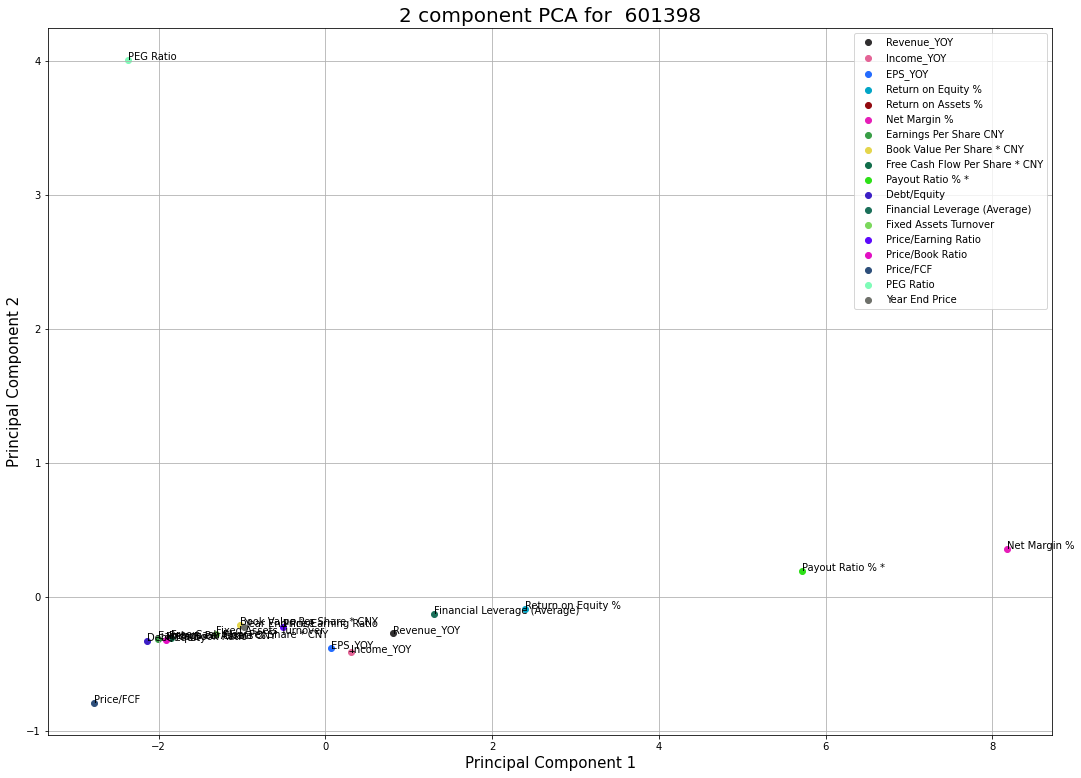

In [12]:
Stock = stock_df
Stock = Stock.rename(columns= {'Unnamed: 0': 'Description'})
Stock = Stock.set_index('Description').T
Stock = Stock.dropna(how='all', axis= 1)
Stock = Stock.drop(['Shares Mil','Market Capital Mil'],axis=1)  #May exclude more Financial Ratio if needed check for results

X = StandardScaler().fit_transform(Stock.T)
pca = PCA(n_components=2)
pricipleComponents = pca.fit_transform(X)
principalDF = pd.DataFrame(data = pricipleComponents, index=Stock.T.index ,columns=['PC_1','PC_2'])

fig = plt.figure(figsize = (18,13))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for  '+name, fontsize = 20)
targets = principalDF.index

for x, y in zip(principalDF['PC_1'],principalDF['PC_2']):
  rgb = np.random.rand(3,)
  plt.scatter(x,y,c = [rgb])
ax.legend(targets)

n = principalDF.index

for i, txt in enumerate(n):
    ax.annotate(txt, (principalDF.PC_1[i], principalDF.PC_2[i]))
ax.grid()